In [11]:
import sys
#sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )
sys.path.append( '../NMEG_utils/py_modules/' )

%matplotlib inline
import load_nmeg as ld
import transform_nmeg as tr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import ipdb as ipdb

sns.set_style("white")

data_path = 'C:/Research_Flux_Towers/Flux_Tower_Data_by_Site/'
#data_path = '/home/greg/sftp/eddyflux/Fluxall_files/'
#fig_path = '/home/greg/current/NMEG_miscellany/figures/multiyear_figs/'

In [67]:
# Years to load
start = 2010
end = 2014
# Sites to load
site = 'New_GLand'
# Empty dict for hourly dataframes
hourly = dict()

# Fill dict with multiyear dataframes for each site in sites
def dparser( y, m, d, H, M, S ):
    yr = int( y )
    mon = int( m )
    day = int( d )
    hr = int( H )
    mn =  int( M )
    sec = int( S )
    
    # Some files have a line of zeros at the end - hack it
    #if yr != year_arg:
    #    yr = 1955
    return ( dt.datetime( yr, mon, day, hr, mn, sec ))

site_df = pd.DataFrame()
for i in range( start, end+1) :
    path = data_path + site + '/' + site + '_FLUX_all_' + str( i ) + '.txt'
    new = pd.read_csv(path, delimiter='\t', parse_dates={'tstamp':[0, 1, 2, 3, 4, 5]},
                                 date_parser=dparser, index_col='tstamp')
    site_df = site_df.append( new )
    
site_df.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2010-01-01 00:00:00, ..., 2014-12-31 00:00:00]
Length: 87548, Freq: None, Timezone: None

# get the soil columns

In [86]:
soilcols = [s for s in site_df.columns if 'SWC' in s]
soilcols

['SWC_G1_12p5_Avg',
 'SWC_G1_22p5_Avg',
 'SWC_G1_2p5_Avg',
 'SWC_G1_37p5_Avg',
 'SWC_G1_52p5_Avg',
 'SWC_G2_12p5_Avg',
 'SWC_G2_22p5_Avg',
 'SWC_G2_2p5_Avg',
 'SWC_G2_37p5_Avg',
 'SWC_G2_52p5_Avg',
 'SWC_O1_12p5',
 'SWC_O1_12p5_Avg',
 'SWC_O1_22p5',
 'SWC_O1_22p5_Avg',
 'SWC_O1_2p5',
 'SWC_O1_2p5_Avg',
 'SWC_O1_37p5',
 'SWC_O1_37p5_Avg',
 'SWC_O1_52p5',
 'SWC_O1_52p5_Avg',
 'SWC_O2_12p5',
 'SWC_O2_12p5_Avg',
 'SWC_O2_22p5',
 'SWC_O2_22p5_Avg',
 'SWC_O2_2p5',
 'SWC_O2_2p5_Avg',
 'SWC_O2_37p5',
 'SWC_O2_37p5_Avg',
 'SWC_O2_52p5',
 'SWC_O2_52p5_Avg',
 'SWC_g1_12p5',
 'SWC_g1_22p5',
 'SWC_g1_2p5',
 'SWC_g1_37p5',
 'SWC_g1_52p5',
 'SWC_g2_12p5',
 'SWC_g2_22p5',
 'SWC_g2_2p5',
 'SWC_g2_37p5',
 'SWC_g2_52p5']

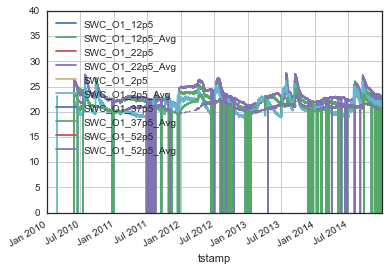

In [87]:

soilcols = [s for s in site_df.columns if 'SWC_O1' in s]
subset = site_df[soilcols]
subset.plot()
plt.show()